In [109]:
import os

In [110]:
os.getcwd()

'/Users/rehanahmed/Documents/USC/Fall 2021/CSCI-544 NLP/Project'

In [125]:
f = open('SCORES.md','r')
lines = f.read().split('\n')
f.close()

In [126]:
score_dict = {}

level = 'word'
lang = ''
for i in lines:
    line = i.split()
    if len(line)>0: 
        if line[0] in ['english_0','english_1','filipino','chinese','korean']:
            lang = line[0]
            if lang not in score_dict:
                score_dict[lang] = {}
        elif line[0] in ['NB','LR','SVM','RF','GB']:
            cur = line[0]+'_'+level
            score_dict[lang][cur]={}
        elif 'CNN_' in line[0] or 'Ensemble' in line[0]:
            cur = line[0]
            score_dict[lang][cur]={}
            
        elif line[0] in ['not_offensive','offensive','accuracy','macro_avg','weighted_avg']:
            new_ls = list(map(float,line[1:]))
            if line[0]=='accuracy':
                score_dict[lang][cur][line[0]] = new_ls[0]
            else:
                score_dict[lang][cur][line[0]] = {'precision':new_ls[0],'recall':new_ls[1],'F1':new_ls[2],'Support':new_ls[3]}
        
        elif len(line)>1 and line[1]=='Character':
            level = 'char'
        
            
        

In [127]:
languages = score_dict.keys()
languages

dict_keys(['english_0', 'english_1', 'filipino', 'chinese', 'korean'])

In [128]:
models = score_dict['english_1'].keys()
models

dict_keys(['NB_word', 'LR_word', 'SVM_word', 'RF_word', 'CNN_word', 'CNN_char', 'CNN_hybrid', 'CNN_word_embedding', 'CNN_char_embedding', 'CNN_hybird_embedding', 'Ensemble_All', 'Ensemble_Word', 'Ensemble_char', 'NB_char', 'LR_char', 'SVM_char', 'RF_char'])

In [129]:
import json

In [130]:
print(json.dumps(score_dict,indent = 2))

{
  "english_0": {
    "NB_word": {
      "not_offensive": {
        "precision": 0.9,
        "recall": 0.97,
        "F1": 0.93,
        "Support": 10771.0
      },
      "offensive": {
        "precision": 0.93,
        "recall": 0.82,
        "F1": 0.87,
        "Support": 6423.0
      },
      "accuracy": 0.91,
      "macro_avg": {
        "precision": 0.92,
        "recall": 0.89,
        "F1": 0.9,
        "Support": 17194.0
      },
      "weighted_avg": {
        "precision": 0.91,
        "recall": 0.91,
        "F1": 0.91,
        "Support": 17194.0
      }
    },
    "LR_word": {
      "not_offensive": {
        "precision": 0.93,
        "recall": 0.97,
        "F1": 0.95,
        "Support": 10771.0
      },
      "offensive": {
        "precision": 0.95,
        "recall": 0.88,
        "F1": 0.92,
        "Support": 6423.0
      },
      "accuracy": 0.94,
      "macro_avg": {
        "precision": 0.94,
        "recall": 0.93,
        "F1": 0.93,
        "Support": 17194.0

In [131]:
languages = ['english_0','english_1','filipino','chinese','korean']

# Best F1 - Weighted Averages

In [135]:
for lang in languages:
    print(lang,end = " ")

    mx = max([score_dict[lang][i]['weighted_avg']['F1'] for i in score_dict[lang]])
    for i in score_dict[lang]:
        if score_dict[lang][i]['weighted_avg']['F1']==mx:
            print(i,end = " ")
            print(mx,end = " | ")
    print()
        
    
    

english_0 LR_word 0.94 | RF_word 0.94 | 
english_1 LR_word 0.94 | CNN_word 0.94 | CNN_word_embedding 0.94 | Ensemble_All 0.94 | LR_char 0.94 | RF_char 0.94 | 
filipino Ensemble_All 0.89 | 
chinese LR_char 0.78 | SVM_char 0.78 | 
korean LR_char 0.74 | SVM_char 0.74 | 


# Best F1 - Macro Averages

In [136]:
for lang in languages:
    print(lang,end = " ")

    mx = max([score_dict[lang][i]['macro_avg']['F1'] for i in score_dict[lang]])
    for i in score_dict[lang]:
        if score_dict[lang][i]['macro_avg']['F1']==mx:
            print(i,end = " ")
            print(mx,end = " | ")
    print()
        
    
    

english_0 LR_word 0.93 | RF_word 0.93 | LR_char 0.93 | RF_char 0.93 | 
english_1 CNN_word 0.9 | CNN_word_embedding 0.9 | 
filipino Ensemble_All 0.89 | 
chinese LR_char 0.75 | SVM_char 0.75 | 
korean LR_char 0.73 | SVM_char 0.73 | 


# Best F1 - Offensive Detection

In [138]:
for lang in languages:
    print(lang,end = " ")

    mx = max([score_dict[lang][i]['offensive']['F1'] for i in score_dict[lang]])
    for i in score_dict[lang]:
        if score_dict[lang][i]['offensive']['F1']==mx:
            print(i,end = " ")
            print(mx,end = " | ")
    print()
        
    
    

english_0 LR_word 0.92 | 
english_1 LR_word 0.97 | Ensemble_All 0.97 | 
filipino Ensemble_All 0.89 | 
chinese LR_char 0.65 | 
korean Ensemble_char 0.79 | LR_char 0.79 | SVM_char 0.79 | 


In [133]:
f= open('scores.json','w+')
json.dump(score_dict,f,indent=2)
f.close()

In [160]:
all_scores = []
all_models = []
all_langs = []

In [161]:

for lang in languages:
    for i in score_dict[lang]:
        print(i)
        all_langs.append(lang)
        print(score_dict[lang][i]['weighted_avg']['F1'])
        all_models.append(i)
        all_scores.append(score_dict[lang][i]['weighted_avg']['F1'])
    
    

NB_word
0.91
LR_word
0.94
SVM_word
0.92
RF_word
0.94
NB_char
0.88
LR_char
0.93
SVM_char
0.92
RF_char
0.93
NB_word
0.85
LR_word
0.94
SVM_word
0.9
RF_word
0.93
CNN_word
0.94
CNN_char
0.87
CNN_hybrid
0.93
CNN_word_embedding
0.94
CNN_char_embedding
0.87
CNN_hybird_embedding
0.91
Ensemble_All
0.94
Ensemble_Word
0.93
Ensemble_char
0.9
NB_char
0.81
LR_char
0.94
SVM_char
0.92
RF_char
0.94
NB_word
0.77
LR_word
0.82
SVM_word
0.79
RF_word
0.74
CNN_word
0.86
CNN_char
0.68
CNN_hybrid
0.88
Ensemble_All
0.89
Ensemble_Word
0.87
Ensemble_char
0.82
NB_char
0.71
LR_char
0.8
SVM_char
0.76
RF_char
0.75
NB_word
0.67
LR_word
0.77
SVM_word
0.77
RF_word
0.73
CNN_word
0.7
CNN_char
0.61
CNN_hybrid
0.7
CNN_word_embedding
0.72
CNN_char_embedding
0.62
CNN_hybird_embedding
0.72
Ensemble_All
0.75
Ensemble_Word
0.73
Ensemble_char
0.74
NB_char
0.58
LR_char
0.78
SVM_char
0.78
RF_char
0.76
NB_word
0.67
LR_word
0.67
SVM_word
0.67
RF_word
0.6
CNN_word
0.61
CNN_char
0.49
CNN_hybrid
0.63
CNN_word_embedding
0.65
CNN_char_embe

In [163]:
import pandas as pd

In [165]:
df = pd.DataFrame({'lang':all_langs,'model':all_models,'score':all_scores})

In [168]:
df[df['lang']!='english_0'].to_csv('test.csv')

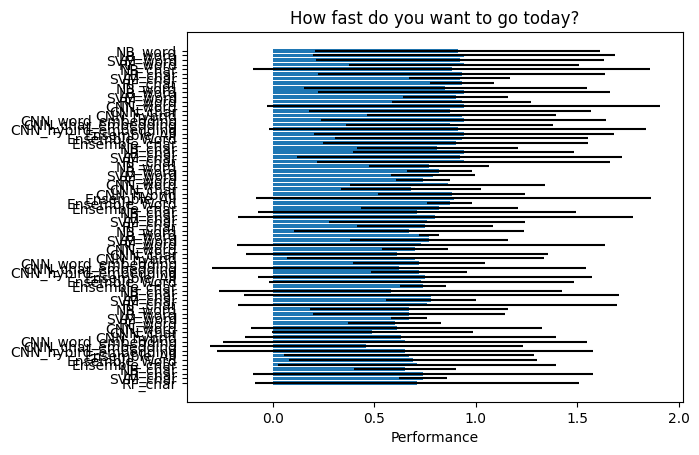

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
# people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
people = all_models
y_pos = np.arange(len(people))
# performance = 3 + 10 * np.random.rand(len(people))
performance = all_scores
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

array([0, 1, 2, 3, 4])